### Otra forma de https://www.youtube.com/watch?v=36hhMZXqtNw&list=LL&index=18

In [62]:
import matplotlib.pyplot as plt
#llamar al data set
from tensorflow import keras


#Configurar el data set
from keras.preprocessing.image import ImageDataGenerator
#Construccion de la red
from keras.models import Sequential
from keras.layers import Dense,Dropout,Activation
from keras.layers import Conv2D, MaxPool2D,Flatten
from keras.optimizers import RMSprop, Adam #para optimizar los pesos
from keras.utils import to_categorical

#Para dividir el data set
from sklearn.model_selection import train_test_split
#
from sklearn.metrics import classification_report, confusion_matrix
#para plotear la matriz de confusion
import seaborn as sn

#Librerias para manejo de datos
import pandas as pd
import numpy as np

import os

# para random
from random import randint

In [53]:
batch_size=32 #numero de imagenes que se pasan a la vez a la red
learning_rate=0.0001 #parametro q le indica a la red cuanta influencia tiene el error, q calcula la funcion de perdida, sobre los pesos. Le indica a la red que tan rapido debe aprender 
num_classes=10
epochs=10 #numero total del  conjunto de datos

In [54]:
#Cargamo el data set
(X_train, y_train), (X_test, y_test) = keras.datasets.cifar10.load_data()
print(X_train.shape[1:])
print(X_test.shape)

(32, 32, 3)
(10000, 32, 32, 3)


In [55]:
#convertimos a las etiquetas al formato adecuado (one hot encoding)
y_trainc=to_categorical(y_train,num_classes)
y_testc=to_categorical(y_test,num_classes)

print (y_trainc)
print ('ty_test', y_testc)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 1.]
 ...
 [0. 0. 0. ... 0. 0. 1.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]]
ty_test [[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 1. 0. 0.]]


In [56]:
unicos, cantidad = np.unique(y_train, return_counts = True)

print(f'El dataset posee imágenes de los siguentes números: {unicos}, y a cada número le corresponde la siguente cantidad: {cantidad}')

El dataset posee imágenes de los siguentes números: [0 1 2 3 4 5 6 7 8 9], y a cada número le corresponde la siguente cantidad: [5000 5000 5000 5000 5000 5000 5000 5000 5000 5000]


In [57]:
unicos, cantidad = np.unique(y_test, return_counts = True)

print(f'El dataset posee imágenes de los siguentes números: {unicos}, y a cada número le corresponde la siguente cantidad {cantidad}')

El dataset posee imágenes de los siguentes números: [0 1 2 3 4 5 6 7 8 9], y a cada número le corresponde la siguente cantidad [1000 1000 1000 1000 1000 1000 1000 1000 1000 1000]


La posición de la imagen a mostrar es la 47090
La etiqueta de la imagen es: [5]


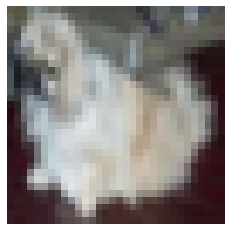

La posición de la imagen a mostrar es la 4216
La etiqueta de la imagen es: [7]


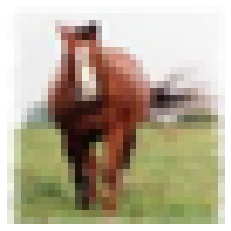

La posición de la imagen a mostrar es la 36771
La etiqueta de la imagen es: [0]


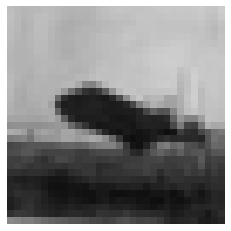

La posición de la imagen a mostrar es la 5269
La etiqueta de la imagen es: [7]


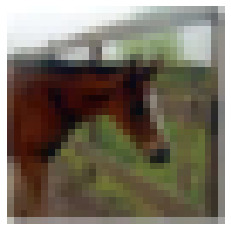

La posición de la imagen a mostrar es la 4763
La etiqueta de la imagen es: [4]


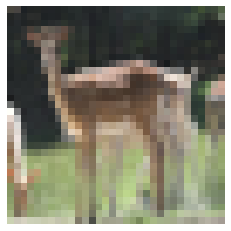

La posición de la imagen a mostrar es la 49287
La etiqueta de la imagen es: [9]


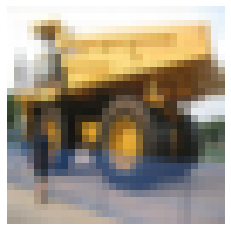

La posición de la imagen a mostrar es la 43279
La etiqueta de la imagen es: [0]


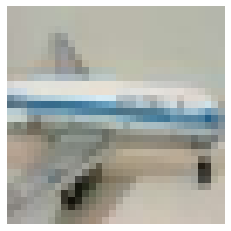

La posición de la imagen a mostrar es la 58751


IndexError: index 58751 is out of bounds for axis 0 with size 50000

In [58]:
#muestro las imagenes
for i in range(10):
    numero = np.random.randint(low = 0, high = 60000)
    print(f'La posición de la imagen a mostrar es la {numero}')
    print(f'La etiqueta de la imagen es: {y_train[numero]}')
    plt.imshow(X_train[numero, :, :], cmap = 'gray')
    plt.axis('off')
    plt.show()

In [63]:
#Definimos nuestra cnn

model= Sequential()

### Primer Bloque

#Capa conv. tiene como parametros:el numero de filtros(extrae 32 tipos de caracteristicas diferentes) de tamaño 3x3
#padding es un parametro vinculado con la convoluion
#input_shape donde definimos el tamaño de los datos de entrada
model.add(Conv2D(32,(3,3),padding='same',input_shape=X_train.shape[1:]))
#Le añadimos a Conv2D la activacion, es una funcion q aporta la no linealidad 
#Son las capases de hacer q una red transforme los datos de un conjunto q no es linealmente separable a un conjunto q si lo es
#Estas son el por q las redes neuronales pueden  resolver pmas complejos
model.add(Activation('relu'))

## Definimos la segunda capa
model.add(Conv2D(32,(3,3)))
model.add(Activation('relu'))
#Capa Max pooling, cada ver que se tiene esta capa se reduce la dimension de la imagen
#Lo hacemos, porq la memoeria de los cpu no es ilimitada y si no hicieramos no se podria entrenar modelos complejos

model.add(MaxPool2D(pool_size=(2,2)))

#Agregamos la capa Dropout, la cual no permite ignorar alguna neuronas de la red
#esto lo hacer para evitar el overfitting, estonces esto permite a la red generalizar mas  y de funcionar mejor con otros datos q no son de entrenamiento 

model.add(Dropout(0.25))

### Segundo bloque q sera igual al anterior
model.add(Conv2D(64,(3,3)))
model.add(Conv2D(64,(3,3)))
model.add(Activation('relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))



In [64]:
### Creo el clasificador(red neuronal fully conected)
#Primero pasamos de 2 dimensiones a 1, esto lo hace la capa flatten
model.add(Flatten())
#Agrego una capa de entrada 
model.add(Dense(512))
#la funsion de activacion que usara
model.add(Activation('relu'))
#Agregamos un Dropout para que sea capas de generalizar mejor 
model.add(Dropout(0.5))
#Agregamos la capa de salida, este capa tiene el mismo numero de neuronas que el de clases
#ya que nuestra red nos dara una salida en onehot, como tenemos las eqtiquetas
model.add(Dense(num_classes))
#Esta funsion de activacion hace q la suma de todas las salidas de igual a 1
model.add(Activation('softmax'))

In [65]:
#Implementamos el optimizador, que actualizara nuestros pesos cada vez q la red se equivoque

#iniciamos el optimizador de la red (RMSprop)
#el optimizador es el metodo para calcular las actualizaciones de los pesos
opt=RMSprop(lr=learning_rate,decay=1e-6) #el decay va haciendo bajar el lr poco a poco, de un valor elevado ya dado a uno de 1e-6,lo hacemos por que mas buena vayan siendo nuestras predicciones de nuetra red menor influencia vaya teniendo el error, para que no se modifique mucho el valor de los pesos  

In [66]:
#Definimos la funcion de perdida q va se la q diga a la red si se a equivocado o no
#entrenamos el modelo con RMSprop, empleando la funcion de perdida categorical_crossentropy
model.compile(loss='categorical_crossentropy',
             optimizer=opt,
             metrics=['accuracy'])

In [67]:
#Preparamos el data set para entrenarlo
#Necesitamos 2 conjuntos de datos. Uno para poner a punto todas nuestras variables de forma optima, y otro para comprobar q tal lo haria nuestro algoritmo con las variables optimas

#Normalizamos las imagnes entre 0 y 1 (Necesario para la convergencia de la red)

Xtr=X_train.astype('float32')
Xtr=X_train/255

Xts=X_test.astype('float32')
Xts=X_train/255

#Normalizamos ya que al tener una red q tiene unos pesos q se van entrenando. Si de entrada tengo valores q van de 0 a 255 estos pesos se actualizaran de forma demaciado brusca por que el error sera muy alto


In [68]:
#Dividimos el conjunto de entrenamiento en 2 subconjuntos 
#Uno q segira siendo de entrenamiento y otro de validacion. Ya que al entrenar el conjunto de entrenamiento tenemos que esperar hasta que termine para testearlo con el conjunto de test 
#random_state permite la repetibilidad de los resultados

Xtr,X_val,y_trainc,y_val=train_test_split(Xtr,y_trainc, test_size=0.2,random_state=42)



In [69]:

#Entrenamos nuestra red

h=model.fit(Xtr,y_trainc,
           batch_size=batch_size,
           epochs=epochs,
           validation_data=(X_val,y_val),
           shuffle=True)

Epoch 1/10
1250/1250 [==============================] - 122s 97ms/step - loss: 1.9141 - accuracy: 0.2943 - val_loss: 1.6215 - val_accuracy: 0.4167
Epoch 2/10
1250/1250 [==============================] - 123s 98ms/step - loss: 1.5669 - accuracy: 0.4294 - val_loss: 1.4002 - val_accuracy: 0.5004
Epoch 3/10
1250/1250 [==============================] - 115s 92ms/step - loss: 1.4300 - accuracy: 0.4853 - val_loss: 1.3221 - val_accuracy: 0.5325
Epoch 4/10
1250/1250 [==============================] - 108s 86ms/step - loss: 1.3409 - accuracy: 0.5221 - val_loss: 1.2310 - val_accuracy: 0.5653
Epoch 5/10
1250/1250 [==============================] - 112s 90ms/step - loss: 1.2728 - accuracy: 0.5488 - val_loss: 1.1748 - val_accuracy: 0.5837
Epoch 6/10
1250/1250 [==============================] - 107s 85ms/step - loss: 1.2096 - accuracy: 0.5723 - val_loss: 1.1112 - val_accuracy: 0.6138
Epoch 7/10
1250/1250 [==============================] - 113s 90ms/step - loss: 1.1616 - accuracy: 0.5935 - val_loss: 1

In [70]:
#Evaluamos el modelo entrenado con el test set, con la accuraci obtenido en la valuacion

scores=model.evaluate(X_test, y_testc,verbose=1 )
print ('loss:',scores[0])
print('acc:',scores[1])
#AL evaluar el conjunto de test podeos ver q nuestro conjuntonto de test, las perdidas obtenidas son de ---- y obtenemos una presicion de ----
#el cual son similares a los otenidos al conjunto de validacion

313/313 [==============================] - 5s 16ms/step - loss: 141.6530 - accuracy: 0.4912
loss: 141.6530303955078
acc: 0.4912000000476837


In [71]:
#Ahora tenemos el modelo entrenado, por lo cual lo guardamos. para ello
model.save('model_10.h5')

In [72]:
#para ver los archivos q hay es con 
!ls -la

"ls" no se reconoce como un comando interno o externo,
programa o archivo por lotes ejecutable.


In [73]:
#para ver que se encuentra en el modelo, osea vemos las claves de nuestro diccionario con el historial de entrenamiento
h.history

{'loss': [1.9141303300857544,
  1.5669472217559814,
  1.4300363063812256,
  1.3408807516098022,
  1.2728239297866821,
  1.2096443176269531,
  1.1615668535232544,
  1.1207990646362305,
  1.080960988998413,
  1.0488957166671753],
 'accuracy': [0.2942500114440918,
  0.4293749928474426,
  0.485275000333786,
  0.5220500230789185,
  0.5487750172615051,
  0.5722749829292297,
  0.5934500098228455,
  0.605525016784668,
  0.623075008392334,
  0.633400022983551],
 'val_loss': [1.6214734315872192,
  1.4002275466918945,
  1.3220638036727905,
  1.2309523820877075,
  1.1748136281967163,
  1.111196756362915,
  1.0687861442565918,
  1.030428171157837,
  0.9892241954803467,
  0.9639440178871155],
 'val_accuracy': [0.41670000553131104,
  0.5004000067710876,
  0.5325000286102295,
  0.5652999877929688,
  0.5837000012397766,
  0.6137999892234802,
  0.6338000297546387,
  0.6373000144958496,
  0.6502000093460083,
  0.663100004196167]}

Text(0, 0.5, 'loss')

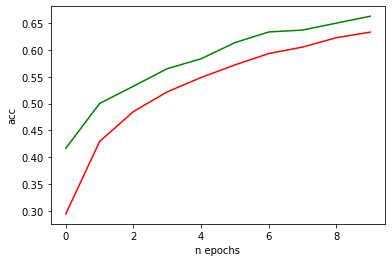

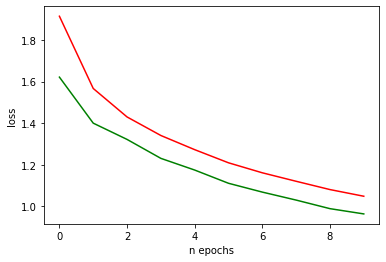

In [75]:
#realizamos las graficas de perdida y precision
plt.figure(0)
plt.plot(h.history['accuracy'],'r')
plt.plot(h.history['val_accuracy'],'g')
plt.xlabel('n epochs')
plt.ylabel('acc')


plt.figure(1)
plt.plot(h.history['loss'],'r')
plt.plot(h.history['val_loss'],'g')
plt.xlabel('n epochs')
plt.ylabel('loss')


313/313 - 5s


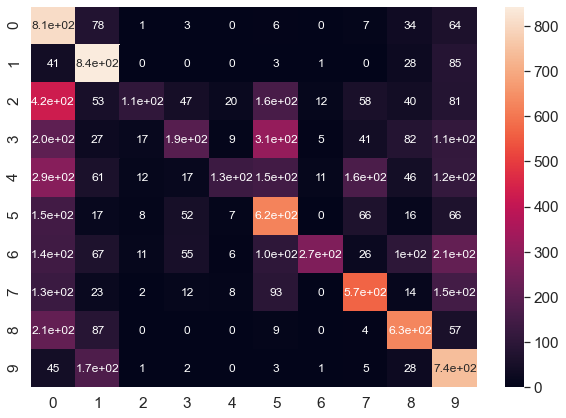

In [76]:
#Graficamos la matris de confusion

#calculamos las predicciones para crear la matriz de confusion
Y_pred=model.predict(X_test,verbose=2)
y_pred=np.argmax(Y_pred,axis=1)

#Calculamos la matriz de confusion
cm=confusion_matrix(np.argmax(y_testc,axis=1),y_pred)

#visualizamos la matriz de confusion con seaborn

df_cm=pd.DataFrame(cm,range(10),range(10))
plt.figure(figsize=(10,7))
sn.set(font_scale=1.4)
sn.heatmap(df_cm,annot=True,annot_kws={'size':12})
plt.show()

Donde vemos q en el eje vertical son las diferentes clases reales q tenemos. Y en el eje horizontal estan las predicciones.
Entonces al tener un valor alto en la diagonal principal, es este caso se al (0,0), significa que para las etiquetas reales cero el numero de imagenes q se han predicho como cero son 8.1e+02. Sin envargo en las que se a equivocado son muy pocas(en este caso no tanto)
Cuando tenemos matriz de confusion con una diagonal alta significa q nuestra red esta funcionando vastante bien

In [77]:
#Ahora veizualizaremos las imagenes con las predicciones del test set

fig, ax=plt.subplot(nrows=2,nclos=4)

for row in ax:
    for col in row:
        img_idx =randint (0,xtest.shape[0])
        img=X_test(img_idx)
        col.imshow(img)
        col.set_title(labels[y_pred[img_idx]])
        col.set_axis_off()
        print (img_idx,labels[y_pred[img_idx]],labels[np.argmax(y_test[img_idx])])
plt.show()


AttributeError: 'AxesSubplot' object has no property 'nrows'

<Figure size 432x288 with 0 Axes>

##################################################

from google.colab import drive
drive.mount('/content/drive')

In [2]:
import tensorflow
from tensorflow import keras
from keras.utils import to_categorical
from tensorflow.keras import layers
import matplotlib.pyplot as plt
from keras.optimizers import Adam
import os
import cv2
import random
import numpy as np
from PIL import Image

In [3]:
def crearDatasetEntrenamiento():
    for categoria in CATEGORIAS:
        path = os.path.join(DATA_ENTRENAMIENTO, categoria)
        clase = CATEGORIAS.index(categoria)
        for imagen in os.listdir(path):
            imagen_array = cv2.imread(os.path.join(path, imagen))
            datos_entrenamiento.append([imagen_array, clase])

In [4]:
def crearDatasetValidacion():
    for categoria in CATEGORIAS:
        path = os.path.join(DATA_VALIDACION, categoria)
        clase = CATEGORIAS.index(categoria)
        for imagen in os.listdir(path):
            imagen_array = cv2.imread(os.path.join(path, imagen))
            datos_test.append([imagen_array, clase])

In [5]:
DATA_ENTRENAMIENTO="/content/drive/MyDrive/TESIS!!!!!/Proyecto/Data/Entrenamiento"


CATEGORIAS=["In","Pa","Ps","RS","Sc","cr"]

datos_entrenamiento=[]
crearDatasetEntrenamiento()
random.shuffle(datos_entrenamiento)
X_train = []
y_train = []

for imagen, etiqueta in datos_entrenamiento:
    X_train.append(imagen)
    y_train.append(etiqueta)

X_train = np.array(X_train)
y_train = np.array(y_train)

type(X_train)
print(X_train.shape)
print(y_train.shape)

(1265, 200, 200, 3)
(1265,)


In [6]:
DATA_VALIDACION="/content/drive/MyDrive/TESIS!!!!!/Proyecto/Data/Validacion"

datos_test = []

crearDatasetValidacion()
random.shuffle(datos_test)
X_test = []
y_test = []

for imagen, etiqueta in datos_test:
    X_test.append(imagen)
    y_test.append(etiqueta)


X_test = np.array(X_test)
y_test = np.array(y_test)
type(X_test)
print(X_test.shape)
print(y_test.shape)

(535, 200, 200, 3)
(535,)


In [7]:
unicos, cantidad = np.unique(y_test, return_counts = True)

print(f'El dataset posee imágenes de los siguentes números: {unicos}, y a cada número le corresponde la siguente cantidad: {cantidad}')

El dataset posee imágenes de los siguentes números: [0 1 2 3 4 5], y a cada número le corresponde la siguente cantidad: [85 90 90 90 90 90]


In [8]:
unicos, cantidad = np.unique(y_train, return_counts = True)

print(f'El dataset posee imágenes de los siguentes números: {unicos}, y a cada número le corresponde la siguente cantidad: {cantidad}')

El dataset posee imágenes de los siguentes números: [0 1 2 3 4 5], y a cada número le corresponde la siguente cantidad: [215 210 210 210 210 210]


In [9]:
#Funcion de rotacion
def rotacion(imagen, angulo):
    imagen = Image.fromarray(imagen)
    imagen_rotada = imagen.rotate(angle = angulo, expand = False)
    return np.array(imagen_rotada)

In [10]:
#Aumento de datos
def aumentacion(imagenes, etiquetas):
    lista_imagenes = []
    lista_etiquetas = []
    
    for i in range(imagenes.shape[0]):
        
        imagen, etiqueta = imagenes[i], etiquetas[i]

        lista_imagenes.append(imagen)
        lista_etiquetas.append(etiqueta)

        lista_imagenes.append(rotacion(imagen, 5))
        lista_etiquetas.append(etiqueta)    

        lista_imagenes.append(rotacion(imagen, -5))
        lista_etiquetas.append(etiqueta)
        
    list_aux = list(zip(lista_imagenes, lista_etiquetas))

    random.shuffle(list_aux)

    lista_imagenes, lista_etiquetas = zip(*list_aux)
    
    return np.asarray(lista_imagenes), np.asarray(lista_etiquetas)

In [11]:
X_train, y_train = aumentacion(X_train, y_train)

print(X_train.shape, y_train.shape)

(3795, 200, 200, 3) (3795,)


In [12]:
##Caraga de datos
#(X_train, y_train), (X_test, y_test) = keras.datasets.mnist.load_data()
#Procesamiento de datos
y_train_c = to_categorical(y_train)
y_test_c = to_categorical(y_test)
#print (y_train_)
print (y_train_c)
print('ksjdnkcnds')
print (y_test_c)

[[0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 1. 0. 0.]
 ...
 [0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 1. 0.]
 [0. 0. 1. 0. 0. 0.]]
ksjdnkcnds
[[0. 0. 1. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0.]
 ...
 [0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 1. 0. 0.]]


In [33]:
#Estructura Neuronal 
# capa de entrada 
Imagen_de_entrada = layers.Input(shape = (200, 200, 3))


#Capa de comvolucion
#X = layers.Conv2D(filters = 32, kernel_size = (3, 3), activation = None)(Imagen_de_entrada)
X = layers.Conv2D(filters = 4, kernel_size = (3, 3), 
                  activation = None, 
                  kernel_regularizer = keras.regularizers.l2(0.01))(Imagen_de_entrada)

#Capa de Normalizacion
X = layers.BatchNormalization()(X)
#Capa de activacion
X = layers.Activation("relu")(X)



#Capa de Max Pooling
X = layers.MaxPooling2D(pool_size = (2, 2))(X)
#######

#Definicion de otra capa de filtrado
#X = layers.Conv2D(filters = 64, kernel_size = (3, 3), activation = None)(X)
X = layers.Conv2D(filters = 4, kernel_size = (3, 3), 
                  activation = None, 
                  kernel_regularizer = keras.regularizers.l2(0.01))(X)


X = layers.BatchNormalization()(X)
  
X = layers.Activation("relu")(X)

X = layers.MaxPooling2D(pool_size = (2, 2))(X)

#Definicion de otra capa de filtrado
#X = layers.Conv2D(filters = 64, kernel_size = (3, 3), activation = None)(X)
X = layers.Conv2D(filters = 8, kernel_size = (3, 3), 
                  activation = None, 
                  kernel_regularizer = keras.regularizers.l2(0.01))(X)

X = layers.BatchNormalization()(X)
  
X = layers.Activation("relu")(X)

X = layers.MaxPooling2D(pool_size = (2, 2))(X)


# Capa Flatten
Flatten = layers.Flatten()(X)

#Capa red fully conected
X = layers.Dense(500, activation = "sigmoid")(Flatten)
X = layers.Dropout(0.5)(X)

X = layers.Dense(500, activation = "sigmoid")(X)

X = layers.Dropout(0.5)(X)

Salida = layers.Dense(units = 6, activation = 'softmax')(X)

#Modelo Keras
Red_Neuronal = keras.Model(inputs = Imagen_de_entrada, outputs = Salida)

#compilacion del modelo
Red_Neuronal.compile(loss = 'categorical_crossentropy', optimizer = Adam(lr=1.0e-4), metrics = ['accuracy'])
#Red_Neuronal.compile(loss = 'sparse_categorical_crossentropy', optimizer = 'Adam', metrics = ['accuracy'])

Historia = Red_Neuronal.fit(x = X_train, y = y_train_c, epochs = 80, batch_size = 128, validation_data = (X_test, y_test_c))

Epoch 1/80
30/30 [==============================] - 2s 55ms/step - loss: 2.0360 - accuracy: 0.2355 - val_loss: 1.8104 - val_accuracy: 0.3159
Epoch 2/80
30/30 [==============================] - 1s 47ms/step - loss: 1.5750 - accuracy: 0.4201 - val_loss: 1.4123 - val_accuracy: 0.4598
Epoch 3/80
30/30 [==============================] - 1s 47ms/step - loss: 1.2787 - accuracy: 0.5267 - val_loss: 1.1454 - val_accuracy: 0.6505
Epoch 4/80
30/30 [==============================] - 1s 47ms/step - loss: 1.1380 - accuracy: 0.5832 - val_loss: 1.0447 - val_accuracy: 0.6673
Epoch 5/80
30/30 [==============================] - 1s 47ms/step - loss: 0.9944 - accuracy: 0.6651 - val_loss: 1.0292 - val_accuracy: 0.6187
Epoch 6/80
30/30 [==============================] - 1s 48ms/step - loss: 0.9253 - accuracy: 0.6758 - val_loss: 1.0644 - val_accuracy: 0.5813
Epoch 7/80
30/30 [==============================] - 1s 47ms/step - loss: 0.8609 - accuracy: 0.7159 - val_loss: 1.0704 - val_accuracy: 0.5047
Epoch 8/80
30

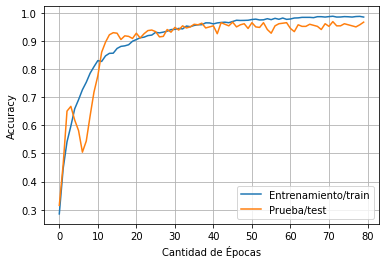

Model: "model_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_8 (InputLayer)         [(None, 200, 200, 3)]     0         
_________________________________________________________________
conv2d_21 (Conv2D)           (None, 198, 198, 4)       112       
_________________________________________________________________
batch_normalization_21 (Batc (None, 198, 198, 4)       16        
_________________________________________________________________
activation_21 (Activation)   (None, 198, 198, 4)       0         
_________________________________________________________________
max_pooling2d_21 (MaxPooling (None, 99, 99, 4)         0         
_________________________________________________________________
conv2d_22 (Conv2D)           (None, 97, 97, 4)         148       
_________________________________________________________________
batch_normalization_22 (Batc (None, 97, 97, 4)         16  

In [34]:
plt.plot(Historia.history['accuracy'], label = 'Entrenamiento/train')
plt.plot(Historia.history['val_accuracy'], label = 'Prueba/test')
plt.grid()
plt.xlabel('Cantidad de Épocas')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

Red_Neuronal.summary()

In [39]:
Predicciones_MNIST = Red_Neuronal.predict(X_train)
#np.round(Predicciones_MNIST[0:70], decimals = 3)

----------------------------------
La posición de la imagen a mostrar es la 250
La etiqueta de la imagen es: 0
Etiqueta: [1. 0. 0. 0. 0. 0.]
Predicción: [0.99  0.    0.003 0.    0.007 0.   ]


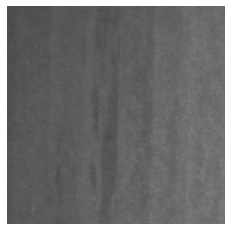

----------------------------------
La posición de la imagen a mostrar es la 106
La etiqueta de la imagen es: 5
Etiqueta: [0. 0. 0. 0. 0. 1.]
Predicción: [0. 0. 0. 0. 0. 1.]


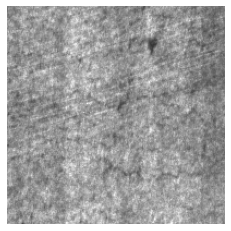

----------------------------------
La posición de la imagen a mostrar es la 3361
La etiqueta de la imagen es: 2
Etiqueta: [0. 0. 1. 0. 0. 0.]
Predicción: [0.    0.002 0.998 0.    0.    0.   ]


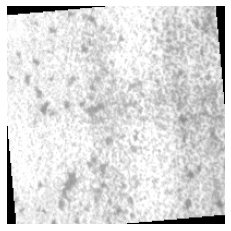

----------------------------------
La posición de la imagen a mostrar es la 2289
La etiqueta de la imagen es: 3
Etiqueta: [0. 0. 0. 1. 0. 0.]
Predicción: [0.    0.    0.    0.999 0.    0.   ]


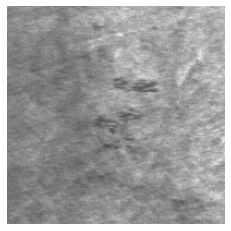

----------------------------------
La posición de la imagen a mostrar es la 2120
La etiqueta de la imagen es: 4
Etiqueta: [0. 0. 0. 0. 1. 0.]
Predicción: [0. 0. 0. 0. 1. 0.]


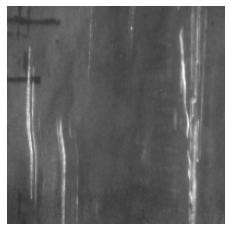

----------------------------------
La posición de la imagen a mostrar es la 175
La etiqueta de la imagen es: 0
Etiqueta: [1. 0. 0. 0. 0. 0.]
Predicción: [0.996 0.    0.003 0.    0.001 0.   ]


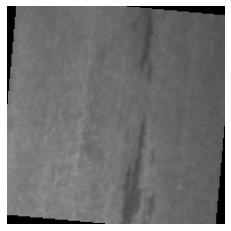

----------------------------------
La posición de la imagen a mostrar es la 3403
La etiqueta de la imagen es: 2
Etiqueta: [0. 0. 1. 0. 0. 0.]
Predicción: [0.076 0.    0.923 0.    0.    0.   ]


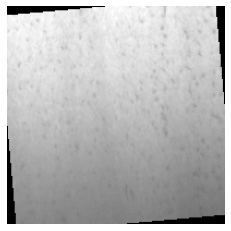

----------------------------------
La posición de la imagen a mostrar es la 913
La etiqueta de la imagen es: 2
Etiqueta: [0. 0. 1. 0. 0. 0.]
Predicción: [0.001 0.    0.999 0.    0.    0.   ]


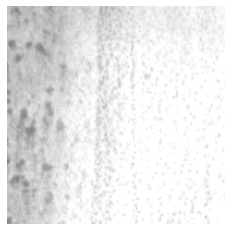

----------------------------------
La posición de la imagen a mostrar es la 1610
La etiqueta de la imagen es: 3
Etiqueta: [0. 0. 0. 1. 0. 0.]
Predicción: [0.    0.    0.    0.999 0.    0.   ]


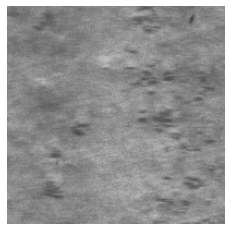

----------------------------------
La posición de la imagen a mostrar es la 2786
La etiqueta de la imagen es: 5
Etiqueta: [0. 0. 0. 0. 0. 1.]
Predicción: [0.    0.001 0.    0.    0.    0.999]


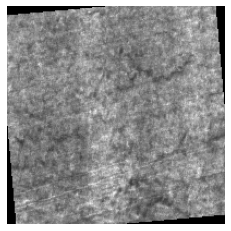

----------------------------------
La posición de la imagen a mostrar es la 1741
La etiqueta de la imagen es: 2
Etiqueta: [0. 0. 1. 0. 0. 0.]
Predicción: [0.048 0.    0.951 0.    0.001 0.   ]


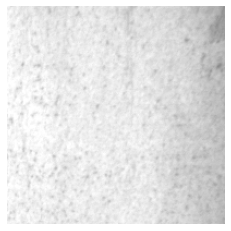

----------------------------------
La posición de la imagen a mostrar es la 3401
La etiqueta de la imagen es: 0
Etiqueta: [1. 0. 0. 0. 0. 0.]
Predicción: [0.992 0.    0.001 0.    0.007 0.   ]


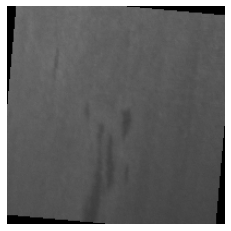

----------------------------------
La posición de la imagen a mostrar es la 1175
La etiqueta de la imagen es: 4
Etiqueta: [0. 0. 0. 0. 1. 0.]
Predicción: [0.    0.    0.001 0.    0.999 0.   ]


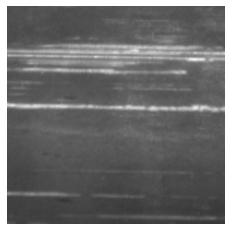

----------------------------------
La posición de la imagen a mostrar es la 418
La etiqueta de la imagen es: 3
Etiqueta: [0. 0. 0. 1. 0. 0.]
Predicción: [0.    0.    0.    0.999 0.    0.   ]


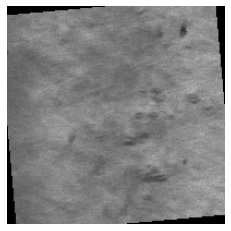

----------------------------------
La posición de la imagen a mostrar es la 1806
La etiqueta de la imagen es: 3
Etiqueta: [0. 0. 0. 1. 0. 0.]
Predicción: [0.    0.    0.    0.999 0.    0.001]


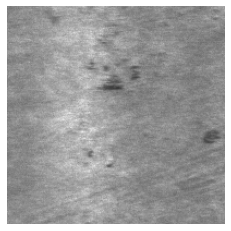

----------------------------------
La posición de la imagen a mostrar es la 1379
La etiqueta de la imagen es: 0
Etiqueta: [1. 0. 0. 0. 0. 0.]
Predicción: [0.883 0.    0.115 0.    0.003 0.   ]


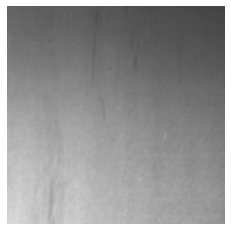

----------------------------------
La posición de la imagen a mostrar es la 1864
La etiqueta de la imagen es: 1
Etiqueta: [0. 1. 0. 0. 0. 0.]
Predicción: [0.    0.996 0.    0.    0.    0.004]


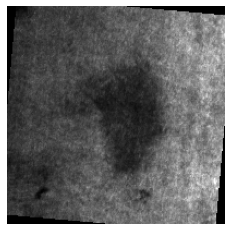

----------------------------------
La posición de la imagen a mostrar es la 197
La etiqueta de la imagen es: 4
Etiqueta: [0. 0. 0. 0. 1. 0.]
Predicción: [0.    0.    0.    0.001 0.998 0.   ]


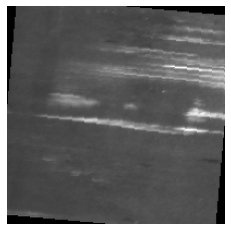

----------------------------------
La posición de la imagen a mostrar es la 2536
La etiqueta de la imagen es: 4
Etiqueta: [0. 0. 0. 0. 1. 0.]
Predicción: [0.    0.    0.006 0.    0.993 0.   ]


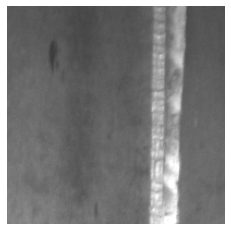

----------------------------------
La posición de la imagen a mostrar es la 1059
La etiqueta de la imagen es: 5
Etiqueta: [0. 0. 0. 0. 0. 1.]
Predicción: [0.    0.001 0.    0.    0.    0.999]


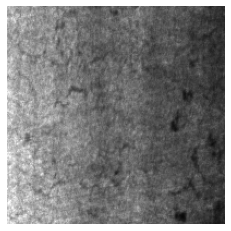

----------------------------------
La posición de la imagen a mostrar es la 525
La etiqueta de la imagen es: 5
Etiqueta: [0. 0. 0. 0. 0. 1.]
Predicción: [0.    0.012 0.    0.    0.    0.987]


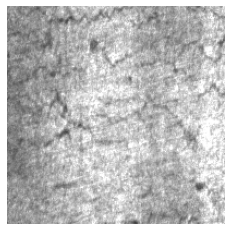

----------------------------------
La posición de la imagen a mostrar es la 3049
La etiqueta de la imagen es: 3
Etiqueta: [0. 0. 0. 1. 0. 0.]
Predicción: [0.    0.    0.001 0.999 0.    0.   ]


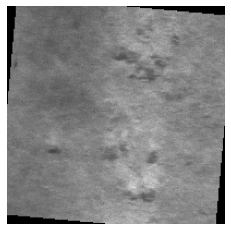

----------------------------------
La posición de la imagen a mostrar es la 2731
La etiqueta de la imagen es: 2
Etiqueta: [0. 0. 1. 0. 0. 0.]
Predicción: [0. 0. 1. 0. 0. 0.]


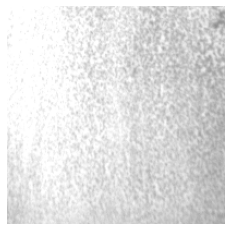

----------------------------------
La posición de la imagen a mostrar es la 601
La etiqueta de la imagen es: 5
Etiqueta: [0. 0. 0. 0. 0. 1.]
Predicción: [0. 0. 0. 0. 0. 1.]


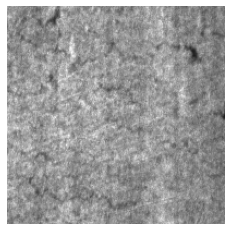

----------------------------------
La posición de la imagen a mostrar es la 2330
La etiqueta de la imagen es: 3
Etiqueta: [0. 0. 0. 1. 0. 0.]
Predicción: [0.    0.    0.    0.999 0.001 0.   ]


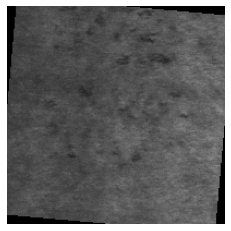

----------------------------------
La posición de la imagen a mostrar es la 3285
La etiqueta de la imagen es: 4
Etiqueta: [0. 0. 0. 0. 1. 0.]
Predicción: [0.    0.    0.001 0.001 0.998 0.   ]


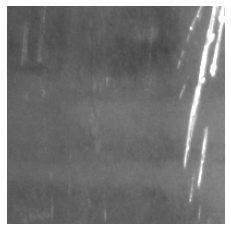

----------------------------------
La posición de la imagen a mostrar es la 868
La etiqueta de la imagen es: 2
Etiqueta: [0. 0. 1. 0. 0. 0.]
Predicción: [0.302 0.001 0.622 0.    0.074 0.   ]


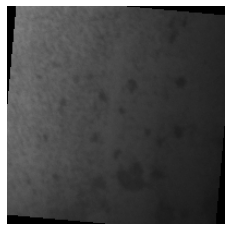

----------------------------------
La posición de la imagen a mostrar es la 1799
La etiqueta de la imagen es: 3
Etiqueta: [0. 0. 0. 1. 0. 0.]
Predicción: [0. 0. 0. 1. 0. 0.]


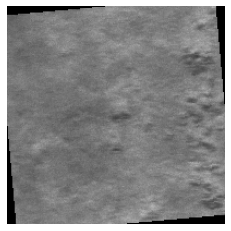

----------------------------------
La posición de la imagen a mostrar es la 2135
La etiqueta de la imagen es: 5
Etiqueta: [0. 0. 0. 0. 0. 1.]
Predicción: [0. 0. 0. 0. 0. 1.]


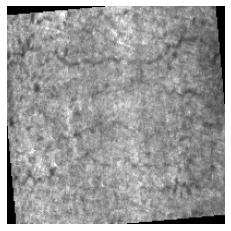

----------------------------------
La posición de la imagen a mostrar es la 3158
La etiqueta de la imagen es: 5
Etiqueta: [0. 0. 0. 0. 0. 1.]
Predicción: [0. 0. 0. 0. 0. 1.]


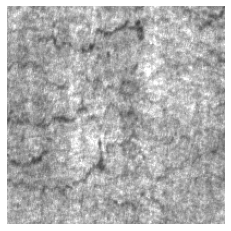

----------------------------------
La posición de la imagen a mostrar es la 3656
La etiqueta de la imagen es: 3
Etiqueta: [0. 0. 0. 1. 0. 0.]
Predicción: [0.    0.    0.    0.999 0.001 0.   ]


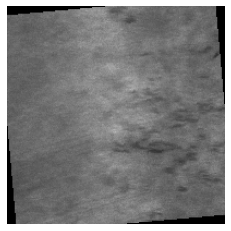

----------------------------------
La posición de la imagen a mostrar es la 2697
La etiqueta de la imagen es: 5
Etiqueta: [0. 0. 0. 0. 0. 1.]
Predicción: [0.    0.001 0.    0.    0.    0.998]


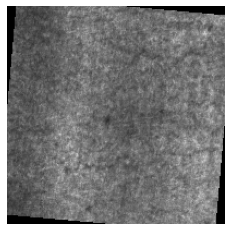

----------------------------------
La posición de la imagen a mostrar es la 1490
La etiqueta de la imagen es: 3
Etiqueta: [0. 0. 0. 1. 0. 0.]
Predicción: [0.    0.    0.    0.999 0.    0.   ]


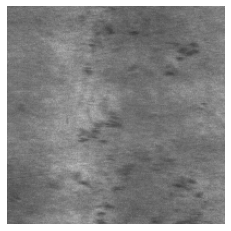

----------------------------------
La posición de la imagen a mostrar es la 3581
La etiqueta de la imagen es: 0
Etiqueta: [1. 0. 0. 0. 0. 0.]
Predicción: [0.99  0.    0.006 0.    0.004 0.   ]


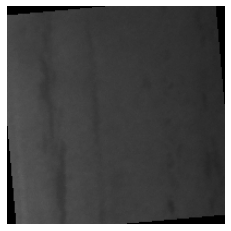

----------------------------------
La posición de la imagen a mostrar es la 1163
La etiqueta de la imagen es: 0
Etiqueta: [1. 0. 0. 0. 0. 0.]
Predicción: [0.962 0.    0.017 0.    0.022 0.   ]


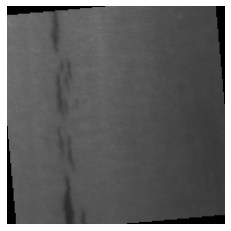

----------------------------------
La posición de la imagen a mostrar es la 377
La etiqueta de la imagen es: 3
Etiqueta: [0. 0. 0. 1. 0. 0.]
Predicción: [0. 0. 0. 1. 0. 0.]


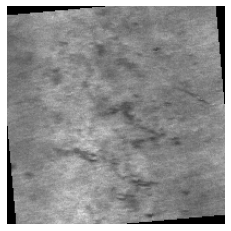

----------------------------------
La posición de la imagen a mostrar es la 368
La etiqueta de la imagen es: 0
Etiqueta: [1. 0. 0. 0. 0. 0.]
Predicción: [0.998 0.    0.001 0.    0.    0.   ]


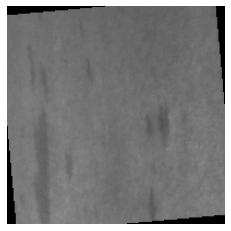

----------------------------------
La posición de la imagen a mostrar es la 1036
La etiqueta de la imagen es: 4
Etiqueta: [0. 0. 0. 0. 1. 0.]
Predicción: [0. 0. 0. 0. 1. 0.]


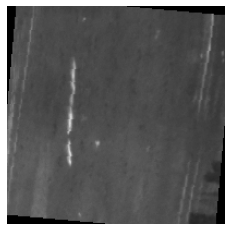

----------------------------------
La posición de la imagen a mostrar es la 1823
La etiqueta de la imagen es: 3
Etiqueta: [0. 0. 0. 1. 0. 0.]
Predicción: [0.    0.    0.    0.999 0.    0.   ]


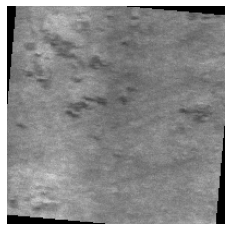

----------------------------------
La posición de la imagen a mostrar es la 806
La etiqueta de la imagen es: 5
Etiqueta: [0. 0. 0. 0. 0. 1.]
Predicción: [0.    0.001 0.    0.    0.    0.999]


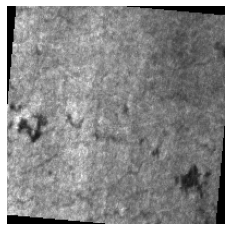

----------------------------------
La posición de la imagen a mostrar es la 2171
La etiqueta de la imagen es: 5
Etiqueta: [0. 0. 0. 0. 0. 1.]
Predicción: [0. 0. 0. 0. 0. 1.]


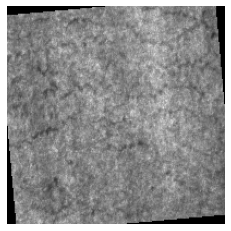

----------------------------------
La posición de la imagen a mostrar es la 2190
La etiqueta de la imagen es: 0
Etiqueta: [1. 0. 0. 0. 0. 0.]
Predicción: [0.993 0.    0.002 0.    0.005 0.   ]


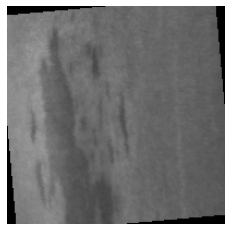

----------------------------------
La posición de la imagen a mostrar es la 36
La etiqueta de la imagen es: 1
Etiqueta: [0. 1. 0. 0. 0. 0.]
Predicción: [0. 1. 0. 0. 0. 0.]


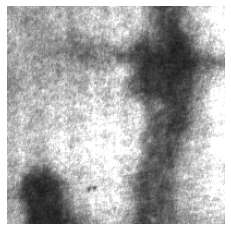

----------------------------------
La posición de la imagen a mostrar es la 2253
La etiqueta de la imagen es: 5
Etiqueta: [0. 0. 0. 0. 0. 1.]
Predicción: [0. 0. 0. 0. 0. 1.]


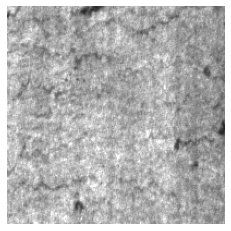

----------------------------------
La posición de la imagen a mostrar es la 1493
La etiqueta de la imagen es: 5
Etiqueta: [0. 0. 0. 0. 0. 1.]
Predicción: [0.    0.016 0.    0.001 0.    0.982]


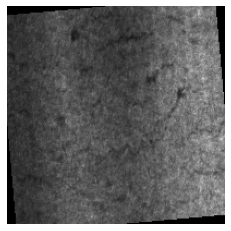

----------------------------------
La posición de la imagen a mostrar es la 967
La etiqueta de la imagen es: 1
Etiqueta: [0. 1. 0. 0. 0. 0.]
Predicción: [0.    0.999 0.    0.    0.    0.   ]


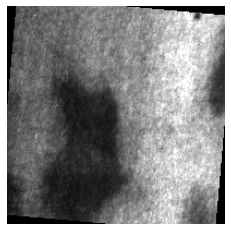

----------------------------------
La posición de la imagen a mostrar es la 2773
La etiqueta de la imagen es: 0
Etiqueta: [1. 0. 0. 0. 0. 0.]
Predicción: [0.997 0.    0.002 0.    0.002 0.   ]


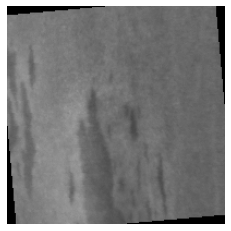

----------------------------------
La posición de la imagen a mostrar es la 674
La etiqueta de la imagen es: 4
Etiqueta: [0. 0. 0. 0. 1. 0.]
Predicción: [0.    0.    0.    0.    0.999 0.   ]


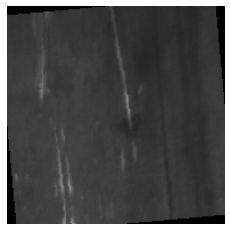

----------------------------------
La posición de la imagen a mostrar es la 3722
La etiqueta de la imagen es: 1
Etiqueta: [0. 1. 0. 0. 0. 0.]
Predicción: [0.    0.999 0.    0.    0.    0.   ]


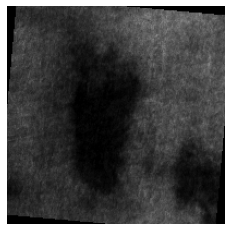

----------------------------------
La posición de la imagen a mostrar es la 1463
La etiqueta de la imagen es: 2
Etiqueta: [0. 0. 1. 0. 0. 0.]
Predicción: [0.    0.    0.999 0.    0.    0.   ]


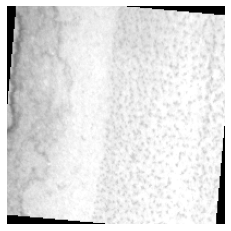

----------------------------------
La posición de la imagen a mostrar es la 1717
La etiqueta de la imagen es: 2
Etiqueta: [0. 0. 1. 0. 0. 0.]
Predicción: [0.007 0.    0.992 0.    0.001 0.   ]


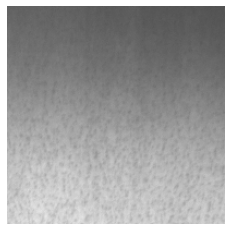

----------------------------------
La posición de la imagen a mostrar es la 2692
La etiqueta de la imagen es: 4
Etiqueta: [0. 0. 0. 0. 1. 0.]
Predicción: [0.    0.    0.001 0.    0.999 0.   ]


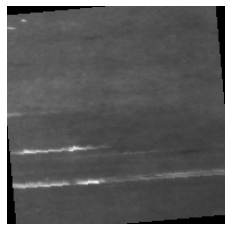

----------------------------------
La posición de la imagen a mostrar es la 1280
La etiqueta de la imagen es: 2
Etiqueta: [0. 0. 1. 0. 0. 0.]
Predicción: [0.005 0.    0.994 0.    0.001 0.   ]


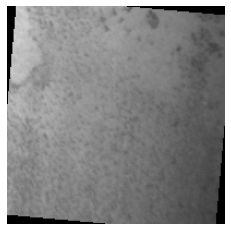

----------------------------------
La posición de la imagen a mostrar es la 1144
La etiqueta de la imagen es: 5
Etiqueta: [0. 0. 0. 0. 0. 1.]
Predicción: [0.    0.003 0.    0.    0.    0.997]


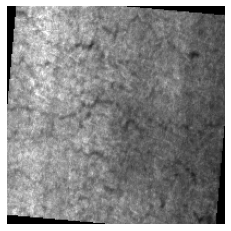

----------------------------------
La posición de la imagen a mostrar es la 250
La etiqueta de la imagen es: 0
Etiqueta: [1. 0. 0. 0. 0. 0.]
Predicción: [0.99  0.    0.003 0.    0.007 0.   ]


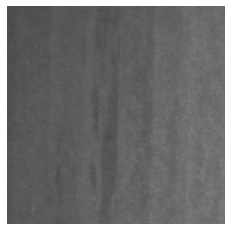

----------------------------------
La posición de la imagen a mostrar es la 73
La etiqueta de la imagen es: 5
Etiqueta: [0. 0. 0. 0. 0. 1.]
Predicción: [0.    0.    0.    0.    0.    0.999]


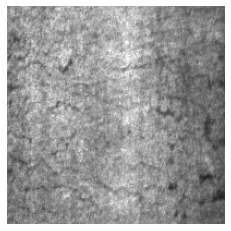

----------------------------------
La posición de la imagen a mostrar es la 3216
La etiqueta de la imagen es: 1
Etiqueta: [0. 1. 0. 0. 0. 0.]
Predicción: [0.    0.984 0.    0.001 0.    0.015]


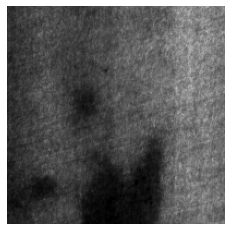

----------------------------------
La posición de la imagen a mostrar es la 2921
La etiqueta de la imagen es: 5
Etiqueta: [0. 0. 0. 0. 0. 1.]
Predicción: [0. 0. 0. 0. 0. 1.]


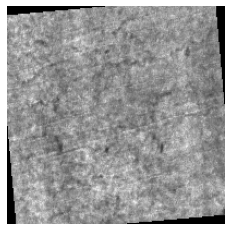

----------------------------------
La posición de la imagen a mostrar es la 345
La etiqueta de la imagen es: 3
Etiqueta: [0. 0. 0. 1. 0. 0.]
Predicción: [0.    0.    0.    0.997 0.002 0.   ]


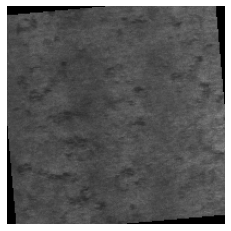

----------------------------------
La posición de la imagen a mostrar es la 3280
La etiqueta de la imagen es: 1
Etiqueta: [0. 1. 0. 0. 0. 0.]
Predicción: [0. 1. 0. 0. 0. 0.]


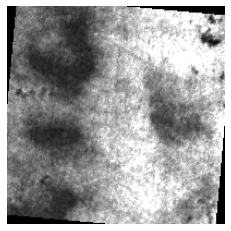

----------------------------------
La posición de la imagen a mostrar es la 1029
La etiqueta de la imagen es: 3
Etiqueta: [0. 0. 0. 1. 0. 0.]
Predicción: [0.    0.    0.    0.999 0.    0.   ]


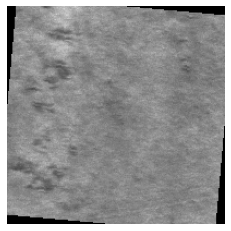

----------------------------------
La posición de la imagen a mostrar es la 715
La etiqueta de la imagen es: 1
Etiqueta: [0. 1. 0. 0. 0. 0.]
Predicción: [0.    0.998 0.001 0.    0.    0.   ]


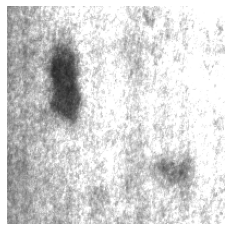

----------------------------------
La posición de la imagen a mostrar es la 3424
La etiqueta de la imagen es: 4
Etiqueta: [0. 0. 0. 0. 1. 0.]
Predicción: [0.001 0.001 0.    0.    0.998 0.   ]


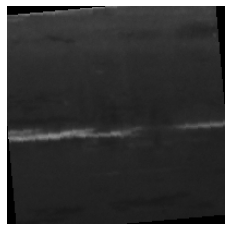

----------------------------------
La posición de la imagen a mostrar es la 2600
La etiqueta de la imagen es: 4
Etiqueta: [0. 0. 0. 0. 1. 0.]
Predicción: [0.002 0.    0.002 0.001 0.995 0.   ]


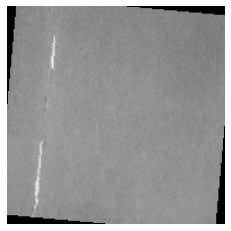

----------------------------------
La posición de la imagen a mostrar es la 1109
La etiqueta de la imagen es: 1
Etiqueta: [0. 1. 0. 0. 0. 0.]
Predicción: [0. 1. 0. 0. 0. 0.]


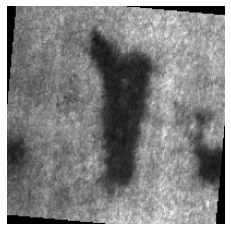

----------------------------------
La posición de la imagen a mostrar es la 252
La etiqueta de la imagen es: 1
Etiqueta: [0. 1. 0. 0. 0. 0.]
Predicción: [0.    0.996 0.    0.    0.    0.004]


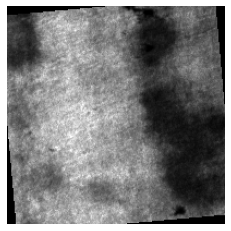

----------------------------------
La posición de la imagen a mostrar es la 1131
La etiqueta de la imagen es: 2
Etiqueta: [0. 0. 1. 0. 0. 0.]
Predicción: [0.002 0.    0.998 0.    0.    0.   ]


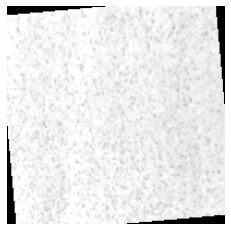

----------------------------------
La posición de la imagen a mostrar es la 2189
La etiqueta de la imagen es: 4
Etiqueta: [0. 0. 0. 0. 1. 0.]
Predicción: [0. 0. 0. 0. 1. 0.]


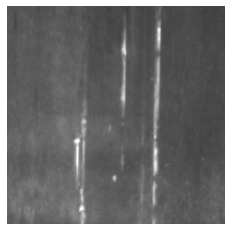

----------------------------------
La posición de la imagen a mostrar es la 2971
La etiqueta de la imagen es: 4
Etiqueta: [0. 0. 0. 0. 1. 0.]
Predicción: [0.    0.    0.    0.002 0.998 0.   ]


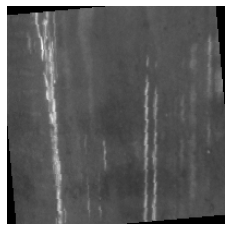

----------------------------------
La posición de la imagen a mostrar es la 82
La etiqueta de la imagen es: 4
Etiqueta: [0. 0. 0. 0. 1. 0.]
Predicción: [0.009 0.    0.001 0.    0.99  0.   ]


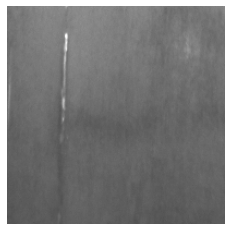

In [40]:


for i in range(70):
    numero = np.random.randint(low = 0, high = 3795)
    print(f'----------------------------------')

    print(f'La posición de la imagen a mostrar es la {numero}')
    print(f'La etiqueta de la imagen es: {y_train[numero]}')
    
    print(f'Etiqueta: {y_train_c[numero]}')
    print(f'Predicción: {np.round(Predicciones_MNIST[numero], decimals = 3)}')
    plt.imshow(X_train[numero, :, :], cmap = 'gray')
    plt.axis('off')
    plt.show()

